In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gan-getting-started/monet_jpg/f4413e97bd.jpg
/kaggle/input/gan-getting-started/monet_jpg/7341d96c1d.jpg
/kaggle/input/gan-getting-started/monet_jpg/de6f71b00f.jpg
/kaggle/input/gan-getting-started/monet_jpg/99d94af5dd.jpg
/kaggle/input/gan-getting-started/monet_jpg/99a51d3e25.jpg
/kaggle/input/gan-getting-started/monet_jpg/d05cab011d.jpg
/kaggle/input/gan-getting-started/monet_jpg/4e05523825.jpg
/kaggle/input/gan-getting-started/monet_jpg/c68c52e8fc.jpg
/kaggle/input/gan-getting-started/monet_jpg/40d7d18ad3.jpg
/kaggle/input/gan-getting-started/monet_jpg/f96a8de9f3.jpg
/kaggle/input/gan-getting-started/monet_jpg/79224da51f.jpg
/kaggle/input/gan-getting-started/monet_jpg/23832dead5.jpg
/kaggle/input/gan-getting-started/monet_jpg/85580214be.jpg
/kaggle/input/gan-getting-started/monet_jpg/47a0548067.jpg
/kaggle/input/gan-getting-started/monet_jpg/fb93438ff9.jpg
/kaggle/input/gan-getting-started/monet_jpg/89d970411d.jpg
/kaggle/input/gan-getting-started/monet_jpg/7960adbd50.j

In [2]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-axtaye_x
  Running command git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-axtaye_x
  Resolved https://www.github.com/keras-team/keras-contrib.git to commit 3fc5ef709e061416f4bc8a92ca3750c824b5d2b0
  Preparing metadata (setup.py) ... done
  Created wheel for keras_contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101060 sha256=4fa502f947cfdccd0318a3f00332c6e8f7dd7dac6f0d56d269ad3376abe87e8b
  Stored in directory: /tmp/pip-ephem-wheel-cache-by6ddclp/wheels/74/d5/f7/0245af7ac33d5b0c2e095688649916e4bf9a8d6b3362a849f5
Successfully built keras_contrib


In [3]:
# !pip install tensorflow-addons==0.17.1

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os

import tensorflow_datasets as tfds

from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization

from tensorflow.keras.preprocessing.image import img_to_array
# import tensorflow_addons as tfa
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, LeakyReLU,Input,Activation,Concatenate,\
Conv2DTranspose
from tensorflow.keras.utils import plot_model,load_img
import PIL

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
np.random.seed(401)

2024-08-13 06:37:23.088595: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-13 06:37:23.088748: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-13 06:37:23.290797: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
# load the dataset path and take a look at all the folders inside
IMG_DIR = '/kaggle/input/gan-getting-started'
# get a list of folder names of the working directory
print(os.listdir(IMG_DIR))

['monet_jpg', 'photo_tfrec', 'photo_jpg', 'monet_tfrec']


In [6]:
Monet_jpg = IMG_DIR+'/monet_jpg/'
Monet_tfrec = IMG_DIR+'/monet_tfrec/'
Photo_jpg = IMG_DIR+'/photo_jpg/'
Photo_tfrec = IMG_DIR+'/photo_tfrec/'

In [7]:
print(f'There are {len(os.listdir(Monet_jpg))} images in Monet_jpg folder.')
print(f'There are {len(os.listdir(Monet_tfrec))} TFRecord files in Monet_tfrec folder.')
print(f'There are {len(os.listdir(Photo_jpg))} images in Photo_jpg folder.')
print(f'There are {len(os.listdir(Photo_tfrec))} TFRecord files in Photo_tfrec folder.')

There are 300 images in Monet_jpg folder.
There are 5 TFRecord files in Monet_tfrec folder.
There are 7038 images in Photo_jpg folder.
There are 20 TFRecord files in Photo_tfrec folder.


(256, 256, 3)

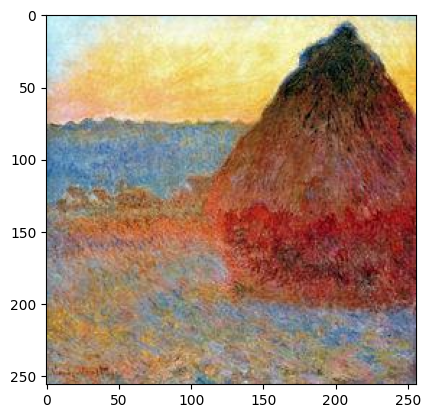

In [8]:
#sample paiting
i = np.random.randint(0, 300)
sample = Monet_jpg+os.listdir(Monet_jpg)[i]
sample_pt = imread(sample)
plt.imshow(sample_pt)
sample_pt.shape

(256, 256, 3)

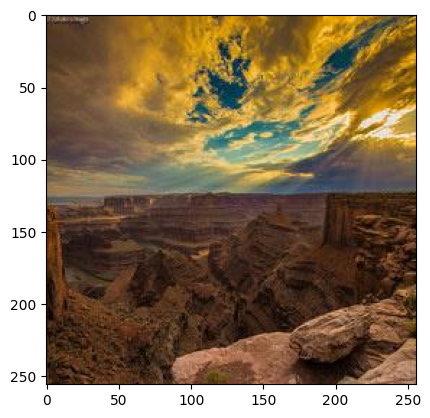

In [9]:
# sample photo
i = np.random.randint(0, 7038)
sample = Photo_jpg+os.listdir(Photo_jpg)[i]
sample_ph = imread(sample)
plt.imshow(sample_ph)
sample_ph.shape